In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt


In [5]:
data = pd.read_csv("train.csv")
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [9]:
# Convert date columns to datetime with correct format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y')

In [10]:
# Handle missing values
data['Postal Code'] = data['Postal Code'].fillna(data['Postal Code'].median())

In [11]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category'])

In [12]:
# Drop unnecessary columns
data.drop(['Row ID', 'Order ID', 'Customer ID', 'Customer Name'], axis=1, inplace=True)

In [13]:
# Feature Engineering (Example: Extract month and year from 'Order Date')
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

In [14]:
# Normalize numerical data (Example: Sales column)
data['Sales'] = (data['Sales'] - data['Sales'].mean()) / data['Sales'].std()

# Display the preprocessed dataset
print(data.head())

  Order Date  Ship Date  Postal Code  \
0 2017-11-08 2017-11-11      42420.0   
1 2017-11-08 2017-11-11      42420.0   
2 2017-06-12 2017-06-16      90036.0   
3 2016-10-11 2016-10-18      33311.0   
4 2016-10-11 2016-10-18      33311.0   

                                        Product Name     Sales  \
0                  Bush Somerset Collection Bookcase  0.049774   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  0.799760   
2  Self-Adhesive Address Labels for Typewriters b... -0.344927   
3      Bretford CR4500 Series Slim Rectangular Table  1.159828   
4                     Eldon Fold 'N Roll Cart System -0.332563   

   Ship Mode_First Class  Ship Mode_Same Day  Ship Mode_Second Class  \
0                  False               False                    True   
1                  False               False                    True   
2                  False               False                    True   
3                  False               False                   False   
4 

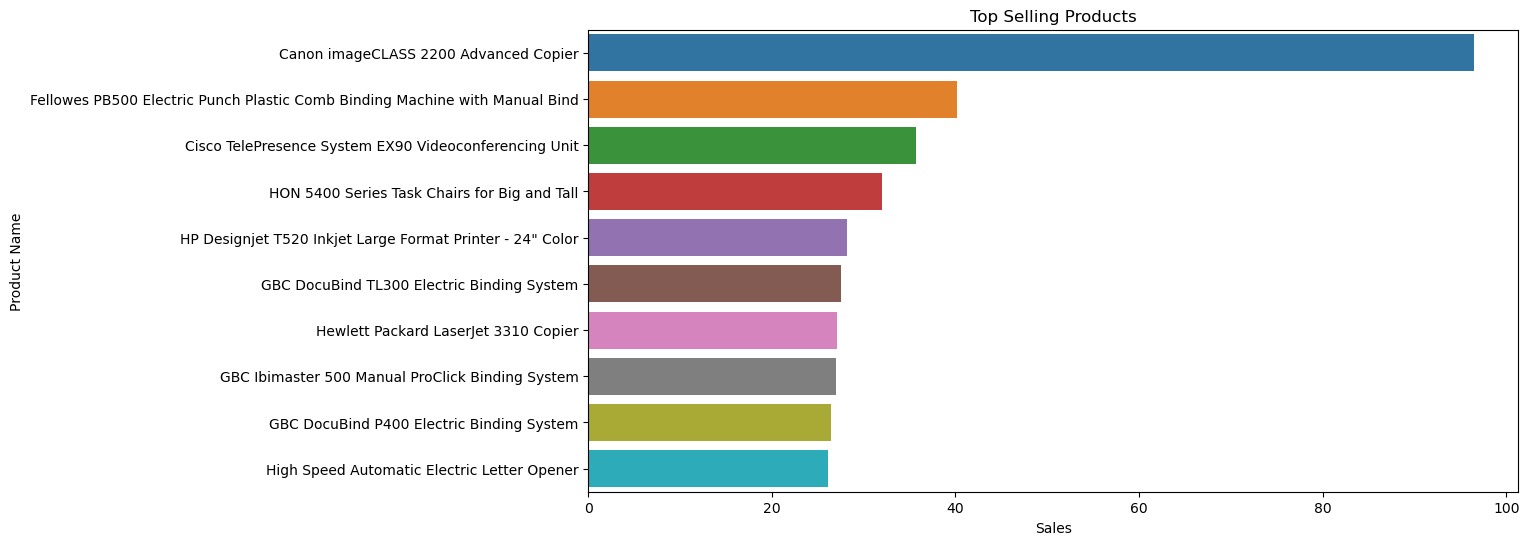

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top Selling Products
top_products = data.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Product Name', data=top_products)
plt.title('Top Selling Products')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

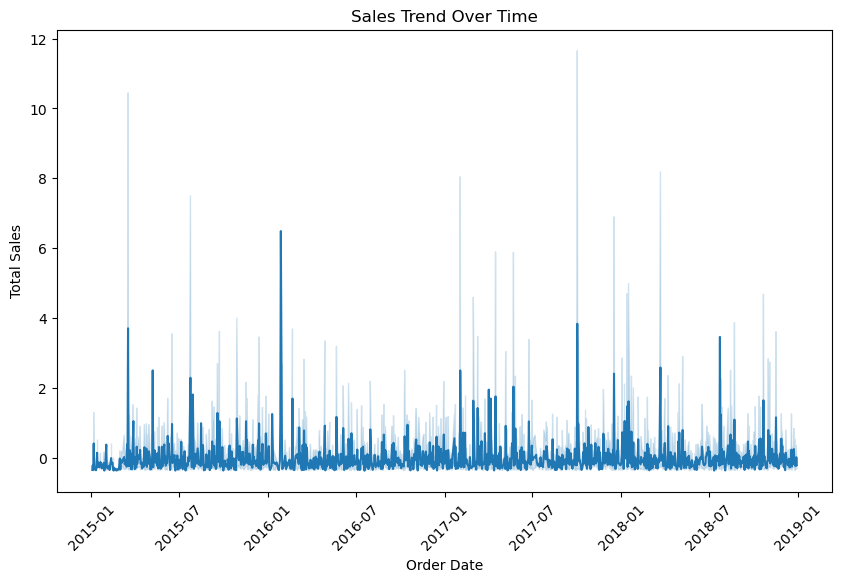

In [23]:
# Sales Trend Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Date', y='Sales', data=data)
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [32]:
data.columns


Index(['Order Date', 'Ship Date', 'Postal Code', 'Product Name', 'Sales',
       'Ship Mode_First Class', 'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Segment_Consumer',
       ...
       'Sub-Category_Furnishings', 'Sub-Category_Labels',
       'Sub-Category_Machines', 'Sub-Category_Paper', 'Sub-Category_Phones',
       'Sub-Category_Storage', 'Sub-Category_Supplies', 'Sub-Category_Tables',
       'Order Month', 'Order Year'],
      dtype='object', length=2478)

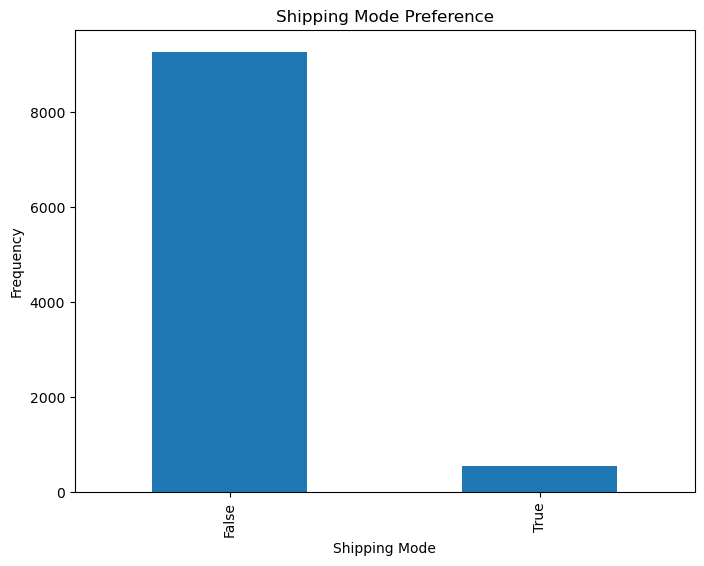

In [30]:
# Shipping Mode Preference
plt.figure(figsize=(8, 6))
data['Ship Mode_Same Day'].value_counts().plot(kind='bar')
plt.title('Shipping Mode Preference')
plt.xlabel('Shipping Mode')
plt.ylabel('Frequency')
plt.show()

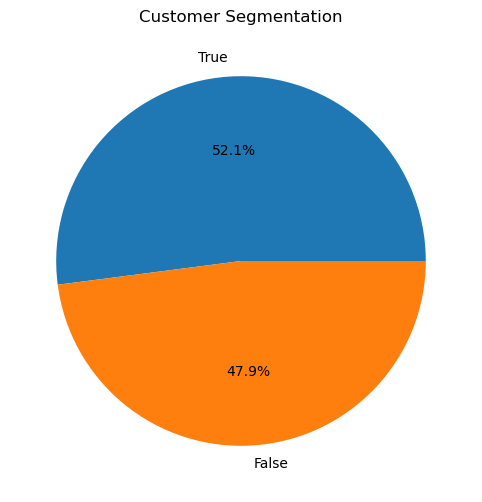

In [31]:
# Customer Segmentation
plt.figure(figsize=(8, 6))
data['Segment_Consumer'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Segmentation')
plt.ylabel('')
plt.show()

In [43]:
# Extract useful features from datetime columns
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
# Similarly, you can extract other features like day of the week, hour, etc.

# Drop the original datetime columns
data.drop(['Order Date', 'Ship Date'], axis=1, inplace=True)


In [48]:
# Perform one-hot encoding for categorical columns
data_encoded = pd.get_dummies(data)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [50]:
# Separate features and target variable
X = data_encoded.drop('Sales', axis=1)
y = data_encoded['Sales']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [53]:
model.score(X_train,y_train)

0.9404455617984563

In [54]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.1566842375773492


In [55]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [57]:
gb_model.score(X_train,y_train)

0.7026704848934556

In [56]:
# Make predictions on the testing set
gb_y_pred = gb_model.predict(X_test)

# Evaluate the model's performance
gb_mse = mean_squared_error(y_test, gb_y_pred)
print(f"Gradient Boosting Mean Squared Error: {gb_mse}")

Gradient Boosting Mean Squared Error: 1.2529081436545029


In [58]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Initialize and train the SVR model
svr_model = make_pipeline(StandardScaler(), SVR())
svr_model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [59]:
svr_model.score(X_train,y_train)

0.48252313977739214